/usr/local/lib/python3.8/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


Processing image  1 / 5932
Processing image  2 / 5932
Processing image  3 / 5932
Processing image  4 / 5932
Processing image  5 / 5932
Processing image  6 / 5932
Processing image  7 / 5932
Processing image  8 / 5932
Processing image  9 / 5932
Processing image  10 / 5932
Processing image  11 / 5932
Processing image  12 / 5932
Processing image  13 / 5932
Processing image  14 / 5932
Processing image  15 / 5932
Processing image  16 / 5932
Processing image  17 / 5932
Processing image  18 / 5932
Processing image  19 / 5932
Processing image  20 / 5932
Processing image  21 / 5932
Processing image  22 / 5932
Processing image  23 / 5932
Processing image  24 / 5932
Processing image  25 / 5932
Processing image  26 / 5932


AttributeError: 'bool' object has no attribute 'orientation'

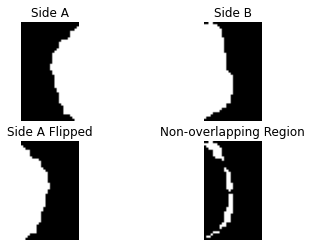

In [1]:
import time
import csv
from pathlib import Path
from skimage import io
import os
from shared.features import  LesionFeatures
from shared import (get_file_names, read_image)
from feature_extraction import asymmetry
from feature_extraction.image_stats import LesionMaskStats

def preprocess_and_extract_features_in_memory(imageName, mask=None, doPlot = True):
    featureStart = time.time()

    try:
        stats = LesionMaskStats(mask)
        asymmetryScore = asymmetry.getAsymmetryScore(stats, doPlot)
    except:
        print('Could not ')
    featureEnd = time.time()
    features = LesionFeatures(asymmetryScore)
    return features, featureEnd - featureStart

def preprocess_and_extract_features_to_disk(imageName, mask=None, dist = 'dist', doPlot = True):
    results = preprocess_and_extract_features_in_memory(imageName, image, mask, doPlot)
    feat = results[1]
    Path(dist).mkdir(parents=True, exist_ok=True)
    Path(f'{dist}/images').mkdir(parents=True, exist_ok=True)
    if results[0]:
        io.imsave(f'{dist}/images/{fNameOnly}', results[0])

    if os.path.exists(f'{dist}/features.csv') == False:
        f = open(f'{dist}/features.csv', 'w+')
        writer = csv.writer(f, lineterminator='\n')
        writer.writerow(['Image'] + feat.featureNamesList + ['featureCalculationTime'])
        writer.writerow([imageName] + feat.featuresList() + [results[2]])
        f.close()
    else:
        f = open(f'{dist}/features.csv', 'a')
        writer = csv.writer(f, lineterminator='\n')
        writer.writerow([imageName] + feat.featuresList() + [results[2]])
        f.close()



idx = 0
maskFilenames = get_file_names.getImagesInDir('/media/austin/Extreme 500/ISIC/masks', 'ISIC')
for f in maskFilenames:
    print('Processing image ', idx + 1, '/', len(maskFilenames))
    fPath = f.split('/')
    fNameOnly = fPath[-1]

    fNameNoExt = fNameOnly.split('.')[0]

    # maskPaths = fPath.copy()
    # maskName = fNameNoExt + '_mask.bmp'
    # maskPaths[-1] = maskName
    # maskPath = '/'.join(maskPaths)
    # print(f)
    # print(maskPath)


    #print('...reading image')
    image = read_image.readImage(f)
    #mask = read_image.readImage(maskPath)

    preprocess_and_extract_features_to_disk(fNameOnly, mask=image, dist='dist/02', doPlot=True if idx == 0 else False)
    idx = idx + 1
